# Quantum Dynamic Pricing Engine
**Backend/Quantum Annealing Optimization**

Required imports:

In [445]:
from dwave.system import EmbeddingComposite, DWaveSampler
import neal
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 

**Placeholder:** Randomly define bitstring of each cluster (bitstring length = # of products, # of bitstrings = # of clusters)

In [500]:
num_clusters = 1
num_columns = 6

bitstrings = set()
while len(bitstrings) < num_clusters:
    a = tuple(np.random.choice([0, 1], size=(num_columns)))
    if a not in bitstrings: bitstrings.add(a)
bitstrings = np.array([list(x) for x in bitstrings])
bitstrings = np.reshape(bitstrings, (bitstrings.shape[0], 1, bitstrings.shape[1]))

In [501]:
bitstrings

array([[[0, 1, 1, 1, 0, 1]]])

**For this case study, simply set bitstrings to string below**

In [526]:
bitstrings = np.array([[[0, 1, 1, 1, 0, 1]]])

**Construct:** Create interaction dictionary per cluster bitstring

In [527]:
interaction_dicts = []

for bs in bitstrings:
    interaction = bs.T @ bs
    interaction = interaction - np.diagflat(np.diag(interaction))
#     interaction = np.where(interaction == 0, -1, interaction)
    interaction = interaction / bitstrings.shape[2]
    J = {(i, j) : col for i, row in enumerate(interaction) for j, col in enumerate(row)}
    interaction_dicts.append(J)

In [528]:
interaction

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16666667, 0.16666667, 0.        ,
        0.16666667],
       [0.        , 0.16666667, 0.        , 0.16666667, 0.        ,
        0.16666667],
       [0.        , 0.16666667, 0.16666667, 0.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 0.16666667, 0.16666667, 0.        ,
        0.        ]])

**Execute:** Execute annealing per interaction dictionary

In [529]:
solver = neal.SimulatedAnnealingSampler()

In [576]:
samples_across_Js = []
a = -0.01 # [-0.1, -0.4, -1]
base = -0.01
h0 = {0:a, 1:a, 2:a, 3:a, 4:a, 5:a}
h1 = {0:base, 1:a, 2:base, 3:base, 4:base, 5:base}

# a = -0.02 # [-0.1, -0.3, -1]
# index = 12
# # h0 = {k: a for k in range(groccenters_inv.shape[2])}
# h1 = {k: -0.01 for k in range(groccenters_inv.shape[2])}
# h1[index] = a

j = 0
for J in [interaction_dicts[0]]:
    sampleset = solver.sample_ising(h1, J,
                                 num_reads = 1000,
                                 label='Dynamic Quantum Pricing')
    samples_across_Js.append(sampleset)
    print(j)
    j = j + 1

0


**Results**

In [531]:
pd_sampleset_small_uniform_0 = samples_across_Js[0].to_pandas_dataframe()
pd_sampleset_small_uniform_0

,0,1,2,3,4,5,energy,num_occurrences
0,1,-1,1,1,1,-1,-0.866667,1
1,1,-1,1,-1,1,1,-0.866667,1
2,1,-1,1,-1,1,1,-0.866667,1
3,1,-1,1,-1,1,1,-0.866667,1
4,1,-1,1,1,1,-1,-0.866667,1
...,...,...,...,...,...,...,...,...
995,1,-1,-1,1,1,1,-0.866667,1
996,1,-1,-1,1,1,1,-0.866667,1
997,1,-1,1,-1,1,1,-0.866667,1
998,1,-1,1,1,1,-1,-0.866667,1


In [532]:
pd_sampleset_small_uniform_0.sum(axis=0)

0                  1000.000000
1                    36.000000
2                     2.000000
3                     6.000000
4                  1000.000000
5                   -44.000000
energy             -866.666667
num_occurrences    1000.000000
dtype: float64

In [547]:
pd_sampleset_small_uniform_1 = samples_across_Js[0].to_pandas_dataframe()
pd_sampleset_small_uniform_1

,0,1,2,3,4,5,energy,num_occurrences
0,1,1,1,-1,1,1,-1.6,1
1,1,-1,1,1,1,1,-1.6,1
2,1,1,-1,1,1,1,-1.6,1
3,1,1,1,1,1,-1,-1.6,1
4,1,1,-1,1,1,1,-1.6,1
...,...,...,...,...,...,...,...,...
995,1,1,1,-1,1,1,-1.6,1
996,1,1,-1,1,1,1,-1.6,1
997,1,-1,1,1,1,1,-1.6,1
998,1,1,-1,1,1,1,-1.6,1


In [548]:
pd_sampleset_small_uniform_1.sum(axis=0)

0                  1000.0
1                   374.0
2                   402.0
3                   392.0
4                  1000.0
5                   412.0
energy            -1572.0
num_occurrences    1000.0
dtype: float64

In [537]:
pd_sampleset_small_uniform_2 = samples_across_Js[0].to_pandas_dataframe()
pd_sampleset_small_uniform_2

,0,1,2,3,4,5,energy,num_occurrences
0,1,-1,1,1,1,1,-4.0,1
1,1,1,-1,1,1,1,-4.0,1
2,1,1,1,1,1,1,-4.0,1
3,1,1,1,1,1,-1,-4.0,1
4,1,-1,1,1,1,1,-4.0,1
...,...,...,...,...,...,...,...,...
995,1,1,1,1,1,-1,-4.0,1
996,1,1,1,-1,1,1,-4.0,1
997,1,1,1,1,1,1,-4.0,1
998,1,1,1,-1,1,1,-4.0,1


In [538]:
pd_sampleset_small_uniform_2.sum(axis=0)

0                  1000.0
1                   584.0
2                   570.0
3                   608.0
4                  1000.0
5                   598.0
energy            -4000.0
num_occurrences    1000.0
dtype: float64

Text(0, 0.5, 'Buying Incentive')

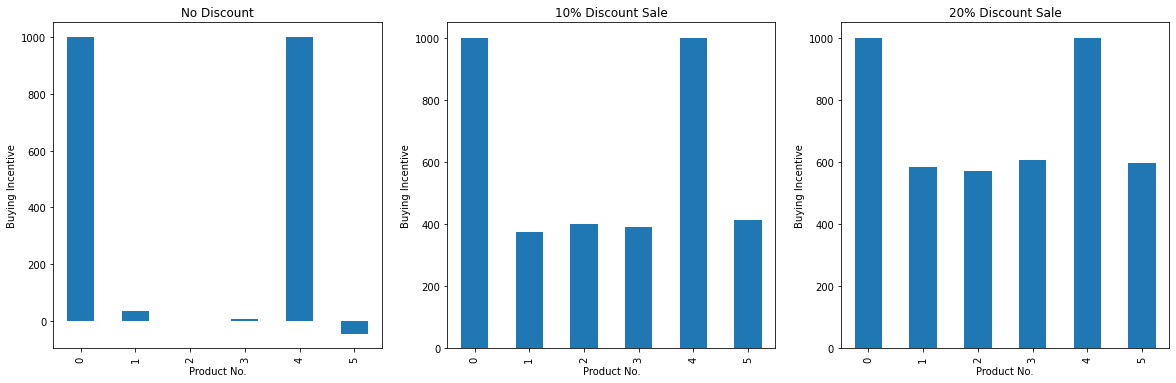

In [549]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
pd_sampleset_small_uniform_0.sum(axis=0)[:6].plot.bar()
plt.title('No Discount')
plt.xlabel('Product No.')
plt.ylabel('Buying Incentive')
plt.subplot(1, 3, 2)
pd_sampleset_small_uniform_1.sum(axis=0)[:6].plot.bar()
plt.title('10% Discount Sale')
plt.xlabel('Product No.')
plt.ylabel('Buying Incentive')
plt.subplot(1, 3, 3)
pd_sampleset_small_uniform_2.sum(axis=0)[:6].plot.bar()
plt.title('20% Discount Sale')
plt.xlabel('Product No.')
plt.ylabel('Buying Incentive')

In [577]:
pd_sampleset_index1_0 = samples_across_Js[0].to_pandas_dataframe()
pd_sampleset_index1_0

,0,1,2,3,4,5,energy,num_occurrences
0,1,1,-1,-1,1,1,-0.686667,1
1,1,-1,1,-1,1,1,-0.686667,1
2,1,-1,-1,1,1,1,-0.686667,1
3,1,1,-1,-1,1,1,-0.686667,1
4,1,1,-1,-1,1,1,-0.686667,1
...,...,...,...,...,...,...,...,...
995,1,-1,1,1,1,-1,-0.686667,1
996,1,-1,1,-1,1,1,-0.686667,1
997,1,-1,-1,1,1,1,-0.686667,1
998,1,-1,-1,1,1,1,-0.686667,1


In [578]:
pd_sampleset_index1_0.sum(axis=0)

0                   998.000000
1                   -10.000000
2                   -52.000000
3                    20.000000
4                  1000.000000
5                    42.000000
energy             -686.646667
num_occurrences    1000.000000
dtype: float64

In [573]:
pd_sampleset_index1_1 = samples_across_Js[0].to_pandas_dataframe()
pd_sampleset_index1_1

,0,1,2,3,4,5,energy,num_occurrences
0,1,1,-1,-1,1,1,-0.726667,1
1,1,1,-1,-1,1,1,-0.726667,1
2,1,-1,-1,1,1,1,-0.646667,1
3,1,-1,1,1,1,-1,-0.646667,1
4,1,1,1,-1,1,-1,-0.726667,1
...,...,...,...,...,...,...,...,...
995,1,1,1,-1,1,-1,-0.726667,1
996,1,1,1,-1,1,-1,-0.726667,1
997,1,-1,-1,1,1,1,-0.646667,1
998,1,-1,-1,1,1,1,-0.646667,1


In [574]:
pd_sampleset_index1_1.sum(axis=0)

0                  1000.000000
1                   288.000000
2                  -128.000000
3                  -110.000000
4                  1000.000000
5                   -50.000000
energy             -698.186667
num_occurrences    1000.000000
dtype: float64

In [569]:
pd_sampleset_index1_2 = samples_across_Js[0].to_pandas_dataframe()
pd_sampleset_index1_2

,0,1,2,3,4,5,energy,num_occurrences
0,1,1,-1,1,1,-1,-0.826667,1
1,1,1,-1,-1,1,1,-0.826667,1
2,1,1,-1,-1,1,1,-0.826667,1
3,1,1,1,-1,1,-1,-0.826667,1
4,1,1,-1,-1,1,1,-0.826667,1
...,...,...,...,...,...,...,...,...
995,1,1,-1,-1,1,1,-0.826667,1
996,1,1,-1,-1,1,1,-0.826667,1
997,1,1,-1,1,1,-1,-0.826667,1
998,1,1,-1,-1,1,1,-0.826667,1


In [570]:
pd_sampleset_index1_2.sum(axis=0)

0                  1000.000000
1                   884.000000
2                  -364.000000
3                  -282.000000
4                  1000.000000
5                  -238.000000
energy             -810.426667
num_occurrences    1000.000000
dtype: float64

Text(0, 0.5, 'Buying Incentive')

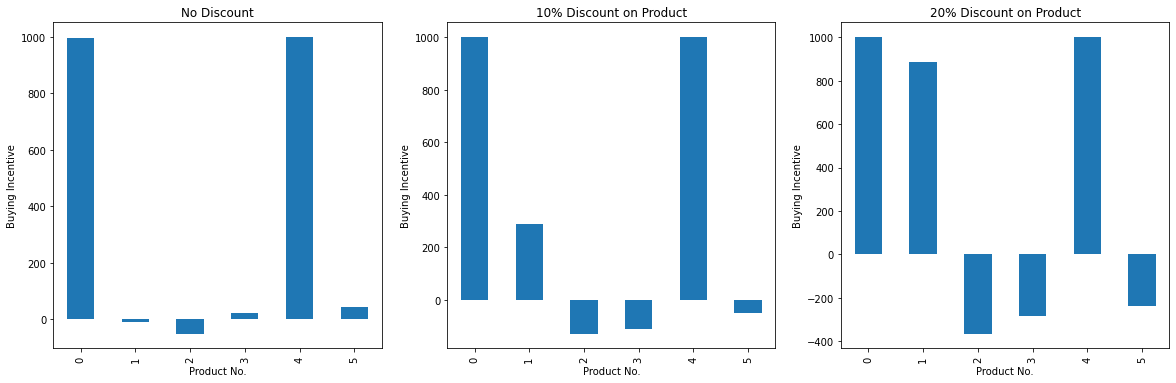

In [579]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
pd_sampleset_index1_0.sum(axis=0)[0:6].plot.bar()
plt.title('No Discount')
plt.xlabel('Product No.')
plt.ylabel('Buying Incentive')
plt.subplot(1, 3, 2)
pd_sampleset_index1_1.sum(axis=0)[0:6].plot.bar()
plt.title('10% Discount on Product')
plt.xlabel('Product No.')
plt.ylabel('Buying Incentive')
plt.subplot(1, 3, 3)
pd_sampleset_index1_2.sum(axis=0)[0:6].plot.bar()
plt.title('20% Discount on Product')
plt.xlabel('Product No.')
plt.ylabel('Buying Incentive')

**Conclusion:**

- Uniform discount incentivizes people to buy all products
- Selective discount incentives people to buy the selected product discounted
- Low discount for a less frequently bought product doesn't influence the sell of the product
- High discount for a less frequently bought product does influence the sell of the product (at the expense of other purchases)